<a href="https://colab.research.google.com/github/stepsbtw/Machine-Learning/blob/main/AM_T2_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#APRENDIZADO DE MÁQUINA (CIC1205/GCC1932) - Trabalho 2

- Nome completo: Caio Passos Torkst Ferreira
- [Link para vídeo](https://)

#1) Engenharia de Features

O conjunto de dados diamonds contém informações sobre mais de 50.000 diamantes, incluindo características como quilate, corte, cor, pureza e preço. Este item visa avaliar a sua capacidade de realizar transformações úteis nas variáveis disponíveis e criar novas features que potencialmente aumentem o poder preditivo de **modelos de regressão**.

## Tarefa

Realize a engenharia de features no conjunto de dados diamonds, considerando as instruções abaixo:

1. **Criação de Novas Features**: Crie pelo menos duas novas variáveis derivadas das existentes. Algumas possibilidades incluem:

  - Combinação de variáveis (ex.: volume do diamante a partir de x, y, z);
  - Codificação ordinal (ex.: transformar cut, color, clarity em variáveis numéricas com base em seu nível de qualidade percebido);
  - Transformações logarítmicas ou polinomiais de variáveis contínuas (ex.: log(carat), carat²);
  - Criação de variáveis binárias ou categóricas a partir de limiares relevantes.

2. **Justificativa**: Para cada nova feature criada, explique o raciocínio por trás da transformação ou combinação. Justifique por que ela pode ser útil para um modelo de regressão que prediz o preço do diamante.

3. **Visualização Exploratória**: Inclua pelo menos dois gráficos (ex.: boxplots, scatterplots com regressão, heatmaps) que ajudem a ilustrar como suas novas features se relacionam com o preço do diamante.

4. **Entrega**: Apresente o código utilizado, os gráficos gerados e as justificativas das novas features no vídeo explicativo do trabalho.

Importando os dados:

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/diamonds.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


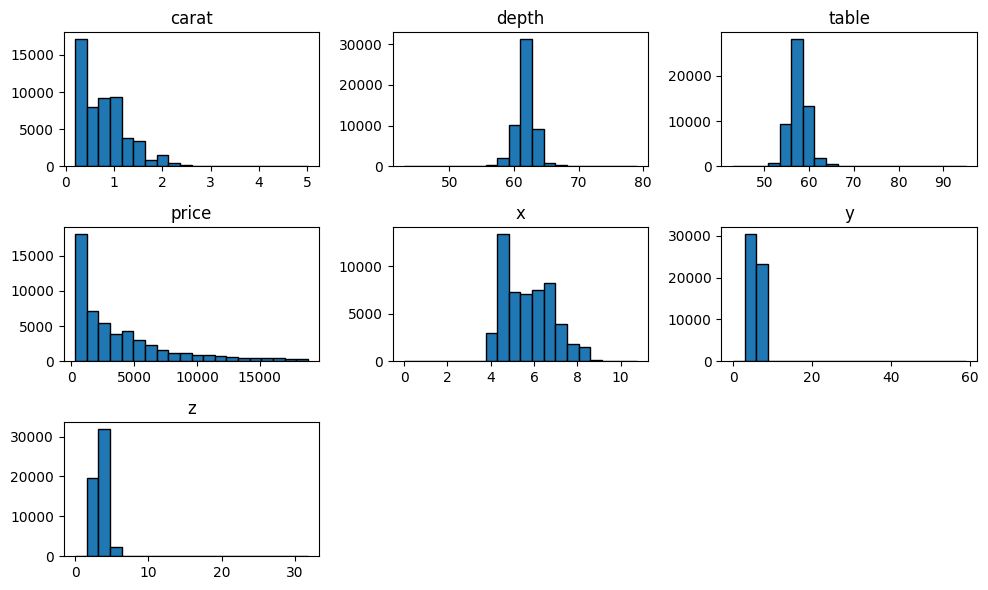

In [2]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,6), edgecolor="black", grid=False, bins=20)
plt.tight_layout()
plt.show()

## 1. Criação de Novas Features


###Combinação de Variáveis
- Volume = $x*y*z$

(Faz sentido pensar que quanto maior o **volume** do diamante, maior o preço).

In [3]:
df["volume"] = df["x"]*df["y"]*df["z"] # cuidado pq é afetado por valores extremos
print(df.iloc[0])

carat          0.23
cut           Ideal
color             E
clarity         SI2
depth          61.5
table          55.0
price           326
x              3.95
y              3.98
z              2.43
volume     38.20203
Name: 0, dtype: object


###Codificação Ordinal

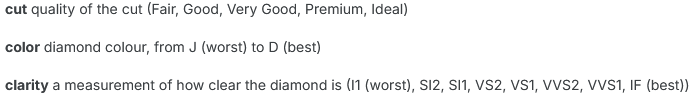

In [4]:
cut_mapping = {"Fair":1, "Good":2, "Very Good":3, "Ideal":4, "Premium":5}
color_mapping = {"J":1, "I":2, "H":3, "G":4, "F":5, "E":6, "D":7}
clarity_mapping = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}

df["cut_encoded"] = df["cut"].map(cut_mapping)
df["color_encoded"] = df["color"].map(color_mapping)
df["clarity_encoded"] = df["clarity"].map(clarity_mapping)

##Transformações de variáveis contínuas

1. log(carat) ou log(1+carat) -> melhora estabilidade em 0. A transformação log "empurra" os dados, tirando o peso da assimetria à direita da variável.

2. carat$^2$ -> A relação entre peso e preço é bem provável de ser não linear, inclusive, exponencial.

3. log(price) ou log(1+price) -> Mesmo sendo minha variável objetivo, vale a pena fazer a log transform para que a convergência seja boa.

Mas devo ao fim da predição, aplicar a transformação inversa para reverter ao valor original.

In [5]:
import numpy as np

df["log_carat"] = np.log1p(df["carat"])

df["log_price"] = np.log1p(df["price"]) # para predição usar: np.expm1(y_pred)

df["log_volume"] = np.log1p(df["volume"])

print(df.iloc[0])

carat                  0.23
cut                   Ideal
color                     E
clarity                 SI2
depth                  61.5
table                  55.0
price                   326
x                      3.95
y                      3.98
z                      2.43
volume             38.20203
cut_encoded               4
color_encoded             6
clarity_encoded           2
log_carat          0.207014
log_price           5.78996
log_volume         3.668729
Name: 0, dtype: object


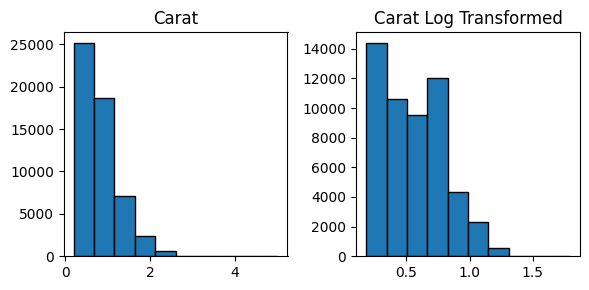

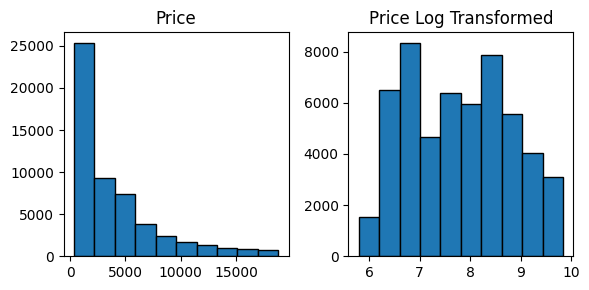

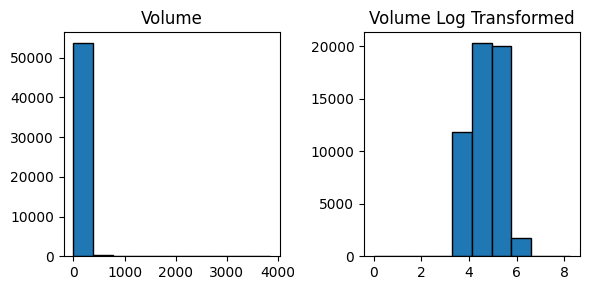

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

df["carat"].hist(edgecolor="black", grid=False, ax=axes[0])
df["log_carat"].hist(edgecolor="black", grid=False, ax=axes[1])
axes[0].set_title("Carat")
axes[1].set_title("Carat Log Transformed")

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(6, 3))

df["price"].hist(edgecolor="black", grid=False, ax=axes[0])
df["log_price"].hist(edgecolor="black", grid=False, ax=axes[1])
axes[0].set_title("Price")
axes[1].set_title("Price Log Transformed")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

df["volume"].hist(edgecolor="black", grid=False, ax=axes[0])
df["log_volume"].hist(edgecolor="black", grid=False, ax=axes[1])
axes[0].set_title("Volume")
axes[1].set_title("Volume Log Transformed")

plt.tight_layout()
plt.show()

Atenção! Não é ideal manter a multicolinearidade no dataset, já que pode levar a um treinamento indevido, criando relações entre variáveis "sintéticas".

Para avaliar se as transformações são efetivas, seria interessante analisar a correlação dessas variáveis com o objetivo.

## Dispersão das transformações
Olhando apenas para as relações com a variável objetivo! Representarei a coluna price no eixo x apenas por visualização.

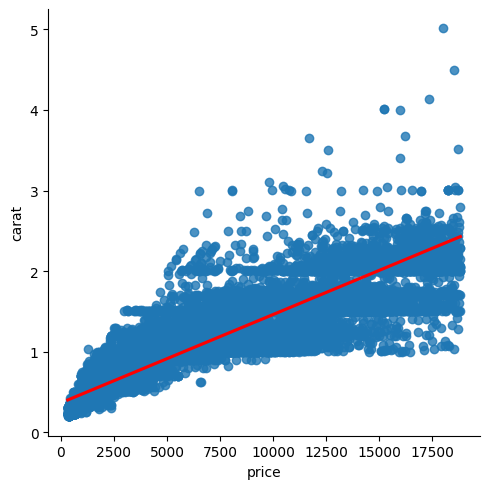

np.float64(0.9215913011934771)

In [7]:
import seaborn as sns

sns.lmplot(data=df, y="carat", x="price", line_kws={"color": "red"})
plt.show()
df["carat"].corr(df["price"])

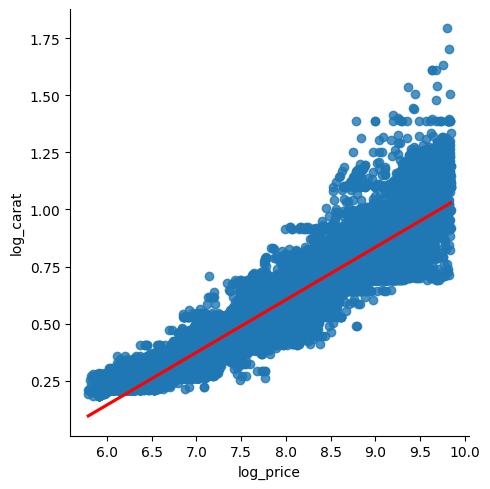

np.float64(0.953514264016555)

In [8]:
sns.lmplot(data=df, y="log_carat", x="log_price", line_kws={"color": "red"})
plt.show()
df["log_carat"].corr(df["log_price"])

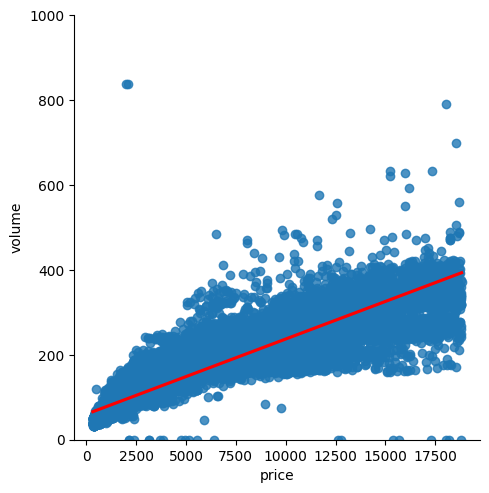

np.float64(0.9023845363055316)

In [9]:
sns.lmplot(data=df, y="volume", x="price", line_kws={"color": "red"})
plt.ylim(0,1000) # limitando por outliers
plt.show()
df["volume"].corr(df["price"])

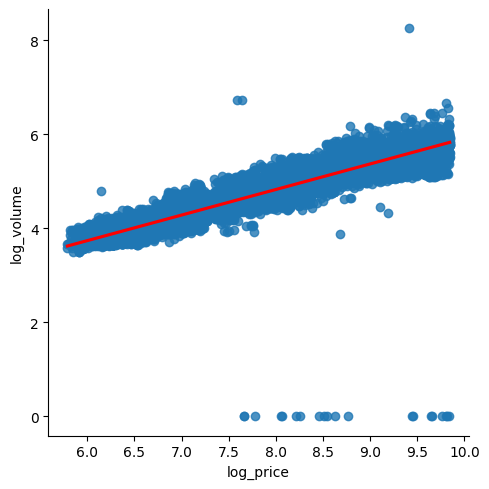

np.float64(0.9510184989580013)

In [10]:
sns.lmplot(data=df, y="log_volume", x="log_price", line_kws={"color": "red"})
plt.show()
df["log_volume"].corr(df["log_price"])

Relação exponencial, o ideal seria log transformar ambas!

OK! Então realmente, posso transformar as variáveis, porém devo tomar cuidado com a relação de outras que não são essas serem afetadas.

##Variáveis Binárias ou Categóricas apartir de Limiares


In [11]:
df["carat"].median()

0.7

- is_heavy : carat > 0.7

Diamentes muito pequenos (leves) parecem ser mais comuns.

In [12]:
df["is_heavy"] = (df["carat"] > 0.7).astype(int)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,cut_encoded,color_encoded,clarity_encoded,log_carat,log_price,log_volume,is_heavy
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,4,6,2,0.207014,5.789960,3.668729,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,5,6,3,0.190620,5.789960,3.569698,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,2,6,5,0.207014,5.793014,3.665531,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,5,2,4,0.254642,5.814131,3.865447,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,2,1,2,0.270027,5.817111,3.968729,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000,4,7,3,0.542324,7.922261,4.761490,1
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175,2,7,3,0.542324,7.922261,4.780049,1
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728,3,7,3,0.530628,7.922261,4.748835,0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120,5,3,2,0.620576,7.922261,4.954179,1


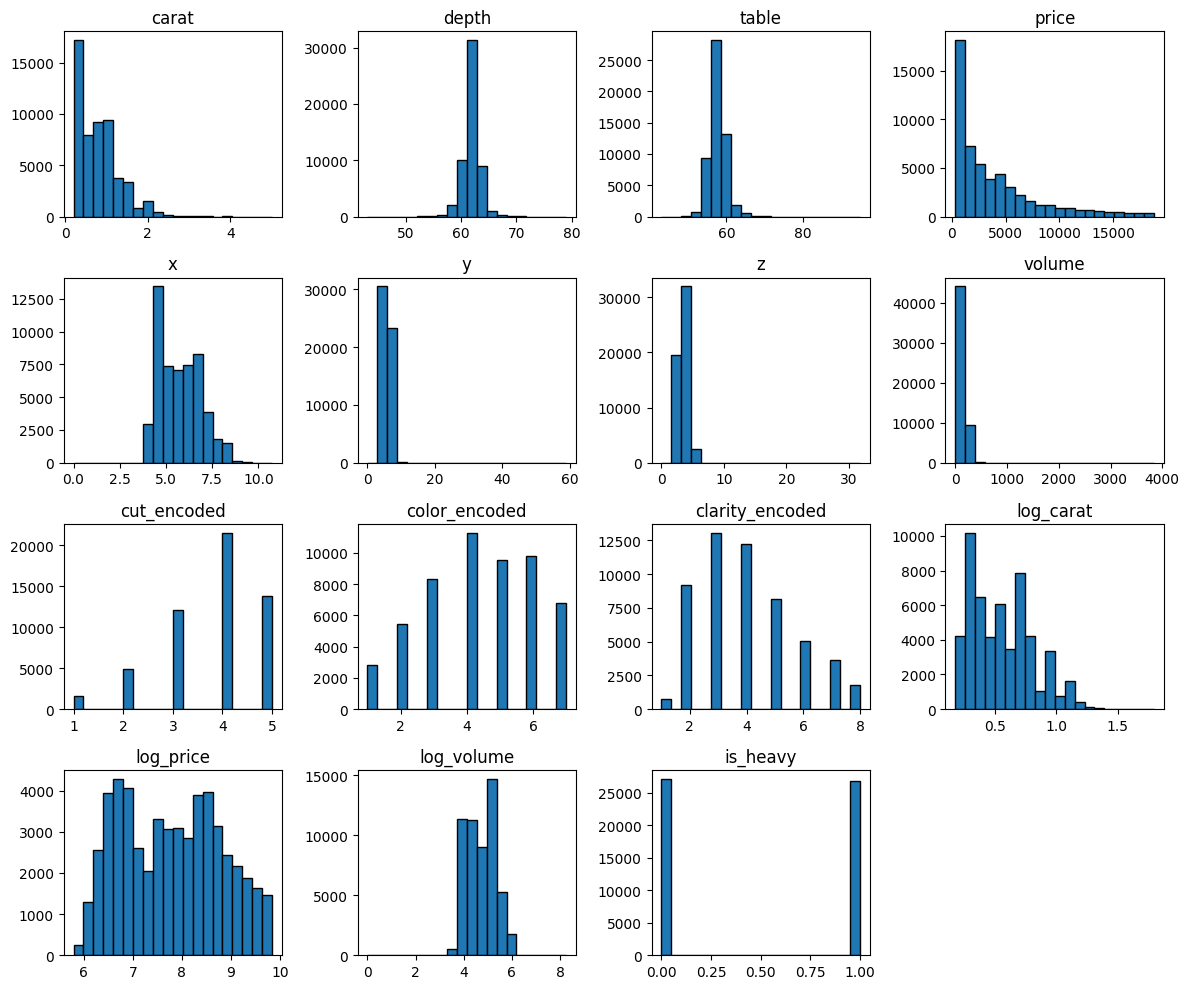

In [13]:
df.hist(figsize=(12,10), edgecolor="black", grid=False, bins=20)
plt.tight_layout()
plt.show()

## Análise Exploratória

Correção na ordem das colunas:

In [14]:
cols = [
    "carat", "log_carat",
    "price", "log_price",
    "volume", "log_volume",
    "x", "y", "z",
    "is_heavy",
    "color_encoded", "clarity_encoded", "cut_encoded",
    "table", "depth"
]

df = df[cols]

### 1. Correlação

In [15]:
corr = df.corr(method="pearson", numeric_only=True)
corr

,carat,log_carat,price,log_price,volume,log_volume,x,y,z,is_heavy,color_encoded,clarity_encoded,cut_encoded,table,depth
carat,1.000000,0.989694,0.921591,0.920255,0.976308,0.939946,0.975094,0.951722,0.953387,0.791282,-0.291437,-0.352841,-0.019311,0.181618,0.028224
log_carat,0.989694,1.000000,0.902041,0.953514,0.966402,0.970410,0.993063,0.969278,0.971377,0.841556,-0.280390,-0.369674,-0.027446,0.189319,0.029431
price,0.921591,0.902041,1.000000,0.895856,0.902385,0.843068,0.884435,0.865421,0.861249,0.696067,-0.172511,-0.146800,0.028843,0.127134,-0.010647
log_price,0.920255,0.953514,0.895856,1.000000,0.900460,0.951018,0.958027,0.936191,0.935235,0.847442,-0.155010,-0.213437,0.001556,0.158208,0.000860
volume,0.976308,0.966402,0.902385,0.900460,1.000000,0.935072,0.956564,0.975143,0.950065,0.771863,-0.284267,-0.341044,-0.008456,0.167400,0.009157
log_volume,0.939946,0.970410,0.843068,0.951018,0.935072,1.000000,0.982725,0.964030,0.978070,0.847987,-0.255767,-0.373259,-0.029093,0.177843,0.016455
x,0.975094,0.993063,0.884435,0.958027,0.956564,0.982725,1.000000,0.974701,0.970772,0.845695,-0.270287,-0.371999,-0.005066,0.195344,-0.025289
y,0.951722,0.969278,0.865421,0.936191,0.975143,0.964030,0.974701,1.000000,0.952006,0.825210,-0.263584,-0.358420,-0.013162,0.183760,-0.029341
z,0.953387,0.971377,0.861249,0.935235,0.950065,0.978070,0.970772,0.952006,1.000000,0.829208,-0.268227,-0.366952,-0.048431,0.150929,0.094924
is_heavy,0.791282,0.841556,0.696067,0.847442,0.771863,0.847987,0.845695,0.825210,0.829208,1.000000,-0.216111,-0.342652,-0.044286,0.177397,0.039539


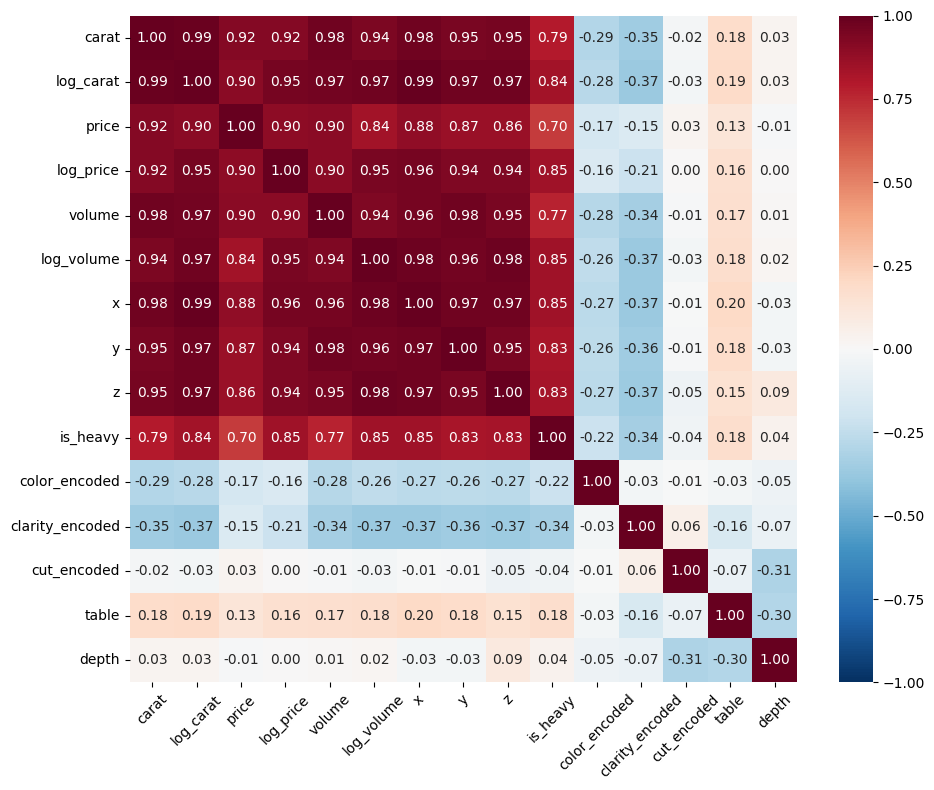

In [16]:
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="RdBu_r", annot=True, fmt=".2f", vmin=-1, vmax=1, square=True)

plt.xticks(rotation=45) # legível
plt.tight_layout()
plt.show()

Sim! Analisando as correlações das features com o preço log transformado é significantemente maior que o original.

Quanto ao volume e carat, vemos este mesmo aumento quando junto ao log do preço.

Portanto concluo que posso retirar sim suas contrapartidas não transformadas do dataset. (Ou pelo menos não devo utilizá-las para nenhuma predição).

Para uma análise ainda mais profunda posso comparar as mais relacionadas entre si somente, assim como as menores.

In [17]:
df = df.drop(columns=["carat","price","volume"])
df.head()

,log_carat,log_price,log_volume,x,y,z,is_heavy,color_encoded,clarity_encoded,cut_encoded,table,depth
0,0.207014,5.789960,3.668729,3.95,3.98,2.43,0,6,2,4,55.0,61.5
1,0.190620,5.789960,3.569698,3.89,3.84,2.31,0,6,3,5,61.0,59.8
2,0.207014,5.793014,3.665531,4.05,4.07,2.31,0,6,5,2,65.0,56.9
3,0.254642,5.814131,3.865447,4.20,4.23,2.63,0,2,4,5,58.0,62.4
4,0.270027,5.817111,3.968729,4.34,4.35,2.75,0,1,2,2,58.0,63.3


Outra realização de multicolinearidade é justamente sobre a criação da variável volume = x*y*z

Literalmente atrapalharia os modelos estatísticos por tentar fazer conexões entre si. Devemos portanto por simplicidade, remover x, y, z.

Visto que a dimensão (volume) parece impactar mais que somente uma dimensão.

In [18]:
df = df.drop(columns=["x","y","z"])
df.head()

,log_carat,log_price,log_volume,is_heavy,color_encoded,clarity_encoded,cut_encoded,table,depth
0,0.207014,5.789960,3.668729,0,6,2,4,55.0,61.5
1,0.190620,5.789960,3.569698,0,6,3,5,61.0,59.8
2,0.207014,5.793014,3.665531,0,6,5,2,65.0,56.9
3,0.254642,5.814131,3.865447,0,2,4,5,58.0,62.4
4,0.270027,5.817111,3.968729,0,1,2,2,58.0,63.3


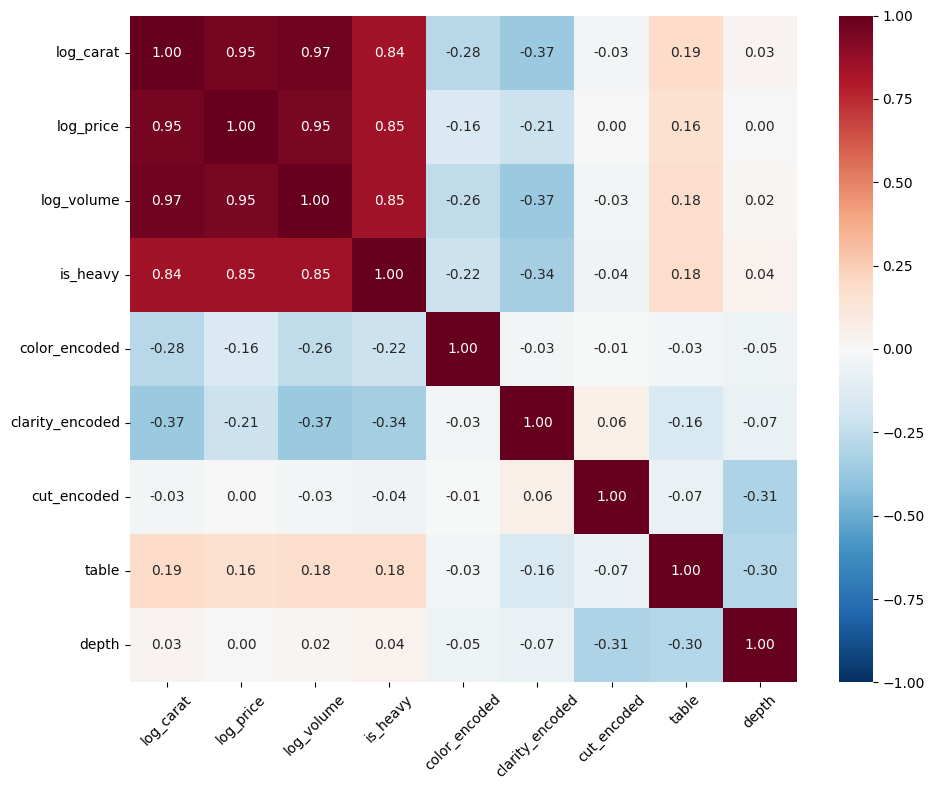

In [19]:
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="RdBu_r", annot=True, fmt=".2f", vmin=-1, vmax=1, square=True)

plt.xticks(rotation=45) # legível
plt.tight_layout()
plt.show()

Para entender a baixa correlação das variáveis categóricas com o valor de price:

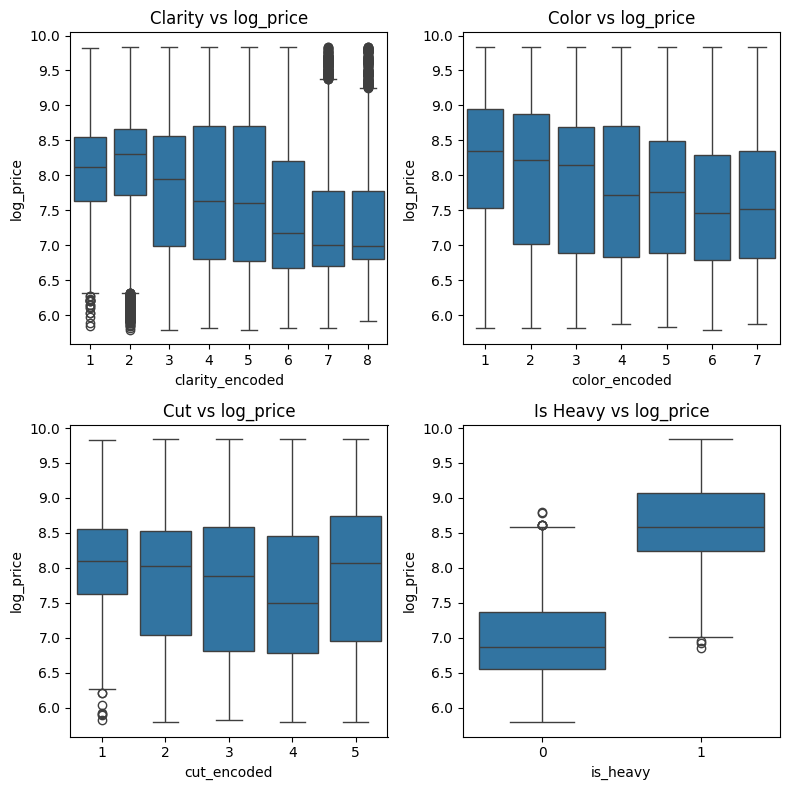

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))  # 3 linhas x 2 colunas
axes = axes.flatten()  # facilita o acesso sequencial aos subplots

# Lista de pares (variável x, título do gráfico)
plots = [
    ("clarity_encoded", "Clarity vs log_price"),
    ("color_encoded", "Color vs log_price"),
    ("cut_encoded", "Cut vs log_price"),
    ("is_heavy", "Is Heavy vs log_price")
]

# Criar cada boxplot
for ax, (x_var, title) in zip(axes, plots):
    sns.boxplot(data=df, x=x_var, y="log_price", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_var)
    ax.set_ylabel("log_price")

plt.tight_layout()
plt.show()


Valido que a variável is_heavy é uma ótima preditora. Não relacionei nada muito forte entre as categóricas e o preço.

In [21]:
diamonds_processed = df

#2) Classificação Ordinal Multiclasses

Nesta item, você deve revisitar os seguinte arquivo A652.pickle. No Trabalho 1, você enquadrou o problema como uma tarefa de classificação binária. Desta vez, você deve enquadrar o problema como uma tarefa de classificação ordinal multi-classes. Concretamente, desta vez,
você deve discretizar os valores de precipitação (medidos em mm/h) produzindo cinco níveis (classes), conforme o seguinte mapeamento:

- $0 \rightarrow NONE$
- $(0, 5] \rightarrow WEAK$
- $(5, 25] \rightarrow MODERATE$
- $(25, 50] \rightarrow STRONG$
- $(50, \inf) \rightarrow EXTREME$

Métodos de aprendizado de máquina para problemas de classificação comumente assumem que os valores das classes não possuem uma ordem. No entanto, em muitas aplicações práticas, os valores das classes exibem, sim, uma ordem natural — por exemplo, ao aprender a atribuir notas ou ao classificar sentimentos (discorda < neutro < concorda), temperaturas (frio < morno < quente). Nesses casos, o problema deve ser enquadrado como uma tarefa de classificação ordinal. Sendo assim, nesse item você deve implementar a abordagem descrita no artigo **Simple Approach to Ordinal Classification** para criar um classificador multi-classes ordinal. Um bom ponto de partida para esta tarefa é [esta página](https://github.com/leeprevost/OrdinalClassifier?tab=readme-ov-file) no portal GitHub.

Crie os modelos de classificação utilizando o algoritmo **GradientBoostingClassifier**. Apresente seus resultados (medidos sobre os respectivos conjuntos de teste) na forma de matrizes de confusão e utilizando a função classification_report do Scikit-Learn. Apresente também uma análise comparativa com o modelo gerado (também usando o algoritmo **GradientBoostingClassifier**) sem considerar que há ordem entre as classes.

In [22]:
import pickle

f = open("/content/drive/MyDrive/data/A652.pickle", "rb")
X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((10012, 24), (10012, 1), (2506, 24), (2506, 1), (9582, 24), (9582, 1))

### Colocando o Target em BINS

In [23]:
import numpy as np
labels = ["NONE", "WEAK", "MODERATE", "STRONG", "EXTREME"]
def categorize_numeric(y):
    labels = np.zeros_like(y, dtype=int) # NONE
    labels[(y > 0) & (y <= 5)] = 1 # WEAK
    labels[(y > 5) & (y <= 25)] = 2 # MODERATE
    labels[(y > 25) & (y <= 50)] = 3 # STRONG
    labels[y > 50] = 4 # EXTREME

    unique, counts = np.unique(labels, return_counts=True)
    print(dict(zip(unique, counts)))

    return labels.flatten()

y_train_bin = categorize_numeric(y_train)
y_val_bin = categorize_numeric(y_val)
y_test_bin = categorize_numeric(y_test)

{np.int64(0): np.int64(9258), np.int64(1): np.int64(664), np.int64(2): np.int64(88), np.int64(3): np.int64(2)}
{np.int64(0): np.int64(2277), np.int64(1): np.int64(222), np.int64(2): np.int64(6), np.int64(3): np.int64(1)}
{np.int64(0): np.int64(8769), np.int64(1): np.int64(757), np.int64(2): np.int64(50), np.int64(3): np.int64(4), np.int64(4): np.int64(2)}


### Treinar um modelo para cada BIN

In [24]:
def fit_ordinal(base_model, X, y):
  n_classes = 5
  models = []

  # Treinamento dos modelos binários para cada limiar ordinal
  for k in range(n_classes - 1):
    # a classe é maior que k? se sim, então pode ser uma das k-1 classes
    y_bin = (y > k).astype(int)

    # existe pelo menos dois rotulos
    if len(np.unique(y_bin)) < 2:
      models.append(None)
      continue

    models.append(base_model().fit(X, y))

  return models

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

models = fit_ordinal(GradientBoostingClassifier, X_train, y_train_bin)

### Predizer com o modelo de cada bin

In [26]:
def predict_ordinal(X, models=models):
  probs = np.zeros((X.shape[0], len(models)))

  for k, model in enumerate(models):
    if model is not None:
      probs[:, k] = model.predict_proba(X)[:, 1]  # prob de y > k
    else:
      probs[:, k] = 0 # nao tem

  # a classe predita é a quantidade com prob > 0.5
  preds = (probs > 0.5).sum(axis=1)
  return preds

In [27]:
y_pred_ordinal = predict_ordinal(X_test, models)

In [28]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train_bin)
y_pred_single = gbc.predict(X_test)

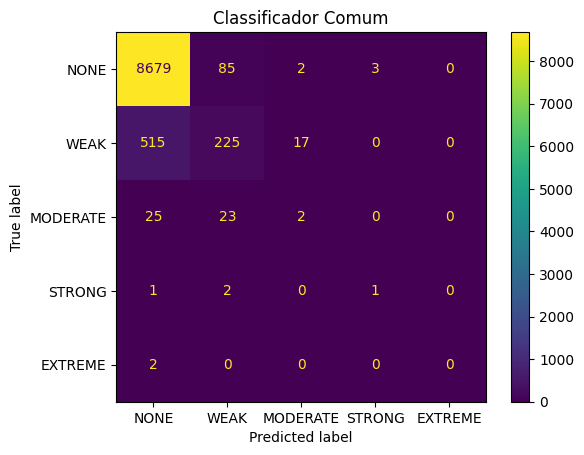

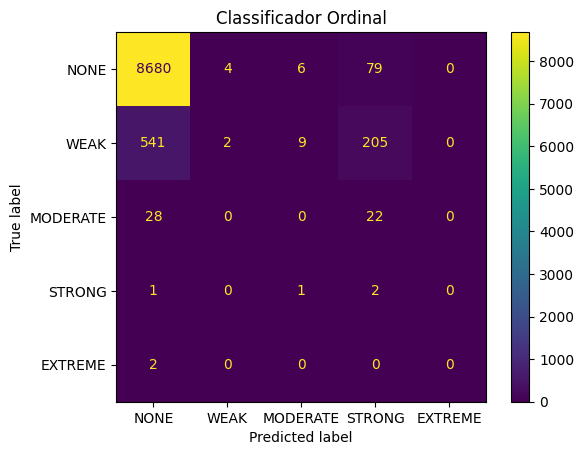

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_bin, y_pred_single, display_labels=labels)
plt.title("Classificador Comum")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_bin, y_pred_ordinal, display_labels=labels)
plt.title("Classificador Ordinal")
plt.show()

In [30]:
from sklearn.metrics import classification_report

print("Classificador Comum:\n")
print(classification_report(y_test_bin, y_pred_single, target_names=labels, zero_division=0))
print("Classificador Ordinal:\n")
print(classification_report(y_test_bin, y_pred_ordinal, target_names=labels, zero_division=0))

Classificador Comum:

              precision    recall  f1-score   support

        NONE       0.94      0.99      0.96      8769
        WEAK       0.67      0.30      0.41       757
    MODERATE       0.10      0.04      0.06        50
      STRONG       0.25      0.25      0.25         4
     EXTREME       0.00      0.00      0.00         2

    accuracy                           0.93      9582
   macro avg       0.39      0.32      0.34      9582
weighted avg       0.91      0.93      0.92      9582

Classificador Ordinal:

              precision    recall  f1-score   support

        NONE       0.94      0.99      0.96      8769
        WEAK       0.33      0.00      0.01       757
    MODERATE       0.00      0.00      0.00        50
      STRONG       0.01      0.50      0.01         4
     EXTREME       0.00      0.00      0.00         2

    accuracy                           0.91      9582
   macro avg       0.26      0.30      0.20      9582
weighted avg       0.88      0.

Nesse caso, o classificador comum acabou tendo um desempenho melhor no geral. Conseguiu acertar alguns exemplos da classe "WEAK" melhor.

Isso acontece porque temos poucos exemplos que se encaixam nas classes.

#3) SHAP Values

Considere novamente o problema de classificação multi-classes apresentado no item 2 deste trabalho. Considere também novos arquivos fornecidos cujos padrões de nomenclatura são:

- A652_train.parquet.gzip
- A652_val.parquet.gzip
- A652_test.parquet.gzip

Nesses arquivos, 652 representa o identificador da estação meteorológica na qual foram observados os dados. Os nomes das colunas nesses arquivos permitem que você entenda o significado de cada coluna.
Inicialmente, junto os exemplos de treino e validação em um único conjunto, para ter mais exemplos para treinar o modelo. Chame esse conjunto de D. Em seguida, crie um modelo de classificação binária usando o algoritmo GradientBoostingClassifier sobre D. Em seguida, apresente uma análise de explicabilidade do comportamento desse modelo sobre os exemplos do conjunto de testes correspondente. Você deve usar a biblioteca SHAP1 para dar suporte à sua análise. Apenas como sugestão (você deve refletir sobre as perguntas que entende fazerem sentido), seguem algumas perguntas para guiar a sua análise.

In [31]:
import pandas as pd

df_train = pd.read_parquet("/content/drive/MyDrive/data/A636_train.parquet.gzip")
df_val = pd.read_parquet("/content/drive/MyDrive/data/A636_test.parquet.gzip")
df_test = pd.read_parquet("/content/drive/MyDrive/data/A636_val.parquet.gzip")

df_train

,temperature,barometric_pressure,relative_humidity,wind_direction_u,wind_direction_v,hour_sin,hour_cos,precipitation
2019-12-04 00:00:00,0.379421,0.473520,0.828947,0.373993,0.464272,0.500000,1.000000,0.0
2019-12-04 01:00:00,0.369775,0.482866,0.855263,0.368324,0.453636,0.629410,0.982963,0.0
2019-12-04 02:00:00,0.369775,0.492212,0.868421,0.371072,0.435378,0.750000,0.933013,0.0
2019-12-04 03:00:00,0.369775,0.489097,0.868421,0.416729,0.464757,0.853553,0.853553,0.0
2019-12-04 04:00:00,0.369775,0.473520,0.868421,0.360939,0.444606,0.933013,0.750000,0.0
...,...,...,...,...,...,...,...,...
2021-05-11 00:00:00,0.254019,0.607477,0.947368,0.369344,0.451028,0.500000,1.000000,0.0
2021-05-11 01:00:00,0.250804,0.604361,0.947368,0.360939,0.444606,0.629410,0.982963,0.0
2021-05-11 02:00:00,0.247588,0.610592,0.947368,0.370155,0.448332,0.750000,0.933013,0.0
2021-05-11 03:00:00,0.254019,0.610592,0.947368,0.410344,0.481481,0.853553,0.853553,0.0


In [32]:
D = pd.concat((df_train, df_val))
X_train = D.drop(columns=["precipitation"])
y_train = D["precipitation"]

X_test = df_test.drop(columns=["precipitation"])
y_test = df_test["precipitation"]

y_train.value_counts()

,count
precipitation,
0.0,18311
0.2,643
0.4,251
0.6,144
0.8,138
...,...
36.2,1
21.8,1
45.6,1


In [33]:
y_train_bin = categorize_numeric(y_train)
models = fit_ordinal(GradientBoostingClassifier, X_train, y_train_bin)

{np.int64(0): np.int64(18311), np.int64(1): np.int64(1869), np.int64(2): np.int64(214), np.int64(3): np.int64(14), np.int64(4): np.int64(1)}


In [34]:
def predict_ordinal(X, models=models):
  probs = np.zeros((X.shape[0], len(models)))

  for k, model in enumerate(models):
    if model is not None:
      probs[:, k] = model.predict_proba(X)[:, 1]  # prob de y > k
    else:
      probs[:, k] = 0 # nao tem

  # a classe predita é a quantidade com prob > 0.5
  preds = (probs > 0.5).sum(axis=1)
  return preds

In [35]:
#%pip install shap
import shap

explainer = shap.Explainer(predict_ordinal, X_train)
shap_vals = explainer(X_test)

ExactExplainer explainer: 2565it [13:16,  3.20it/s]


### 1. Qual a importância de cada feature para uma predição específica?

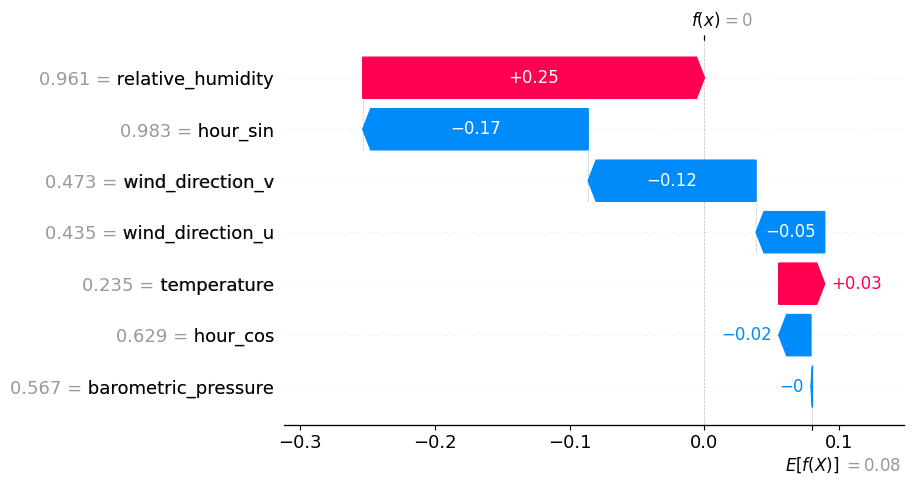

In [38]:
shap.waterfall_plot(shap_vals[0])

As features mais relevantes para essa previsão específica são: relative_humidity, hour_sin e wind_direction_v.

1. relative_humidity (umidade relativa = 0.961):

- Maior influência positiva na predição.

- Aumentou o valor da previsão em +0.25.

2. hour_sin (seno da hora = 0.983):

- Forte influência negativa: −0.17.

- Indica que a hora do dia (seno?) diminui o valor previsto.

3. wind_direction_v (componente V do vento = 0.473):

- Reduziu a predição em −0.12.

### 2. Como uma feature específica impacta a predição em geral?

Se o SHAP dessa variável é, na maioria das vezes, positivo ou negativo, aumentando ou diminuindo a saída do modelo.

Isso é exatamente o que o dependence plot ou o summary plot do SHAP faz.

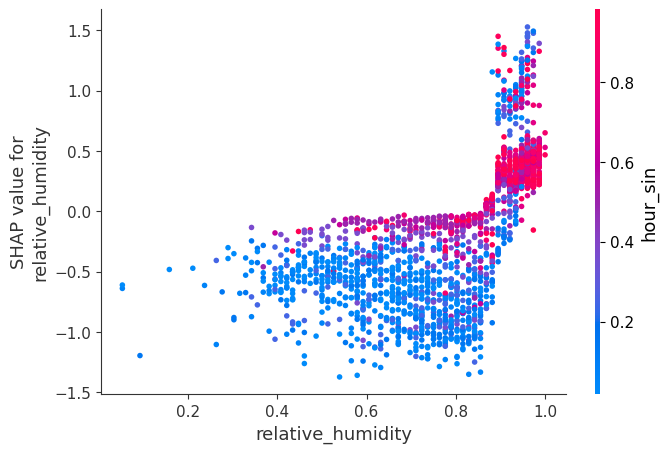

In [42]:
shap.dependence_plot("relative_humidity", shap_vals.values, X_test)

- Impacto geral:

Para valores de umidade abaixo de 0.7–0.8, o impacto de relative_humidity é misto (alguns positivos, outros negativos), e de menor magnitude.

A partir de ~0.8, o valor SHAP cresce rapidamente, indicando que altas umidades aumentam fortemente a predição (valores SHAP positivos).

- Interação com hour_sin:

Os pontos em rosa (hour_sin alto) tendem a ter SHAP values mais positivos para relative_humidity.

Isso sugere que a umidade tem impacto ainda maior durante certos horários do dia, talvez à tarde ou noite (quando hour_sin tende a ser alto).

Esse tipo de dependência e interação seria difícil de ver sem o SHAP, então essa visualização é excelente para explicar modelos complexos.

### 3. Como cada feature contribui para o desempenho do modelo?

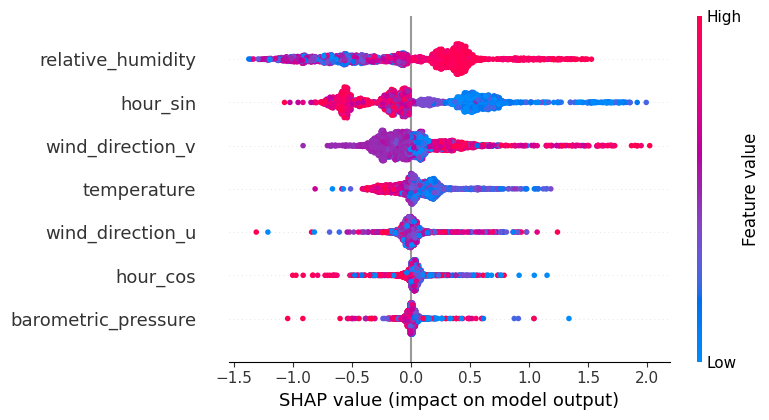

In [43]:
shap.summary_plot(shap_vals)

Interpretações específicas:

- relative_humidity alta (vermelho) geralmente aumenta a predição (SHAP > 0).

- hour_sin alto tende a reduzir a predição (SHAP < 0).

- temperature: temperaturas mais baixas (azul) têm impacto negativo, enquanto temperaturas altas (vermelho) tendem a aumentar o valor previsto.

**Não linearidades:**

A presença de faixas verticais (como em wind_direction_u ou hour_cos) sugere que o modelo está captando interações ou efeitos concentrados em certos valores.

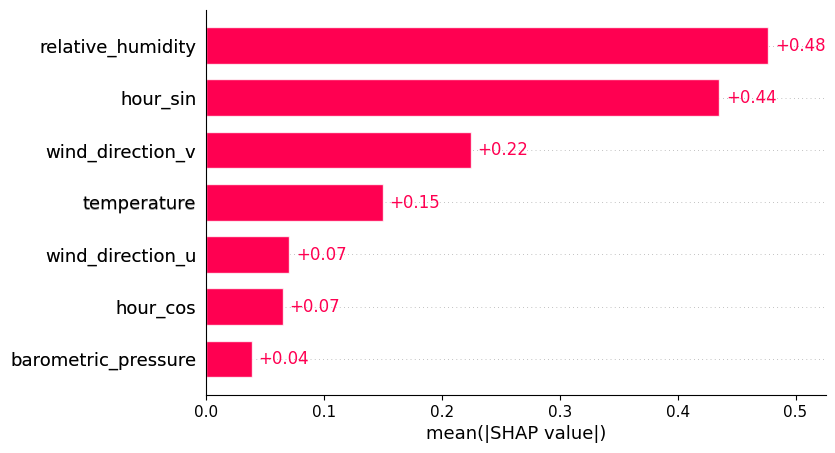

In [44]:
shap.plots.bar(shap_vals)

wind_direction_u, hour_cos e barometric_pressure tem influência praticamente negligenciável no modelo.

### 4. Quais instâncias da classe EXTREME são as mais influenciadas por uma determinada feature?

In [53]:
import numpy as np

# Filtra instâncias da classe EXTREME (label == 4)
idx_extreme = np.where(y_test == 4)[0]

# Pega a posição da feature "temperature"
feature_idx = X_test.columns.get_loc("temperature")

# Extrai os SHAP values numéricos para essa feature nas instâncias EXTREME
temp_vals = shap_vals[idx_extreme, feature_idx].values  # <-- ACESSA os valores corretamente

# Ordena pelas maiores contribuições positivas
ordered_indices = np.argsort(temp_vals)[::-1]
top_indices = ordered_indices[:5]

print(f"As instâncias EXTREME mais influenciadas por 'temperature':")
for rank, i in enumerate(top_indices, start=1):
    idx_in_test = idx_extreme[i]
    print(f"#{rank}")
    print(f"- Índice no X_test: {idx_in_test}")
    print(f"- Valor de temperature: {X_test.iloc[idx_in_test]['temperature']}")
    print(f"- SHAP value de temperature: {temp_vals[i]:.4f}\n")


As instâncias EXTREME mais influenciadas por 'temperature':
#1
- Índice no X_test: 1878
- Valor de temperature: 0.37942122186495175
- SHAP value de temperature: 0.1892

#2
- Índice no X_test: 1586
- Valor de temperature: 0.2347266881028939
- SHAP value de temperature: 0.0404



###5. Quais features têm contribuições consistentes ou inconsistentes em instância da classe EXTREME?

Quais features vêm contribuindo de forma consistente (isto é, com o mesmo sinal) nas previsões.

Quais vêm mostrando um comportamento inconsistente (isto é, às vezes aumentando a saída, às vezes diminuindo).

Verificar se o sinal é consistente ou não.

In [54]:
import numpy as np
import pandas as pd

# Tolerância para evitar inconsistência com valores próximos de zero
tol = 1e-6

# Filtra instâncias da classe EXTREME (label == 4)
idx_extreme = np.where(y_test == 4)[0]

# Subconjunto de valores SHAP para essas instâncias
shap_vals_extreme = shap_vals[idx_extreme]
features = X_test.columns

consistent_features = {}
inconsistent_features = {}

# Itera sobre cada feature
for j, feature in enumerate(features):
    # Acessa os valores SHAP numéricos da j-ésima feature
    values = shap_vals_extreme[:, j].values

    # Verifica consistência de sinal com tolerância
    if np.all(values > tol) or np.all(values < -tol):
        consistent_features[feature] = values.mean()
    else:
        inconsistent_features[feature] = values.mean()

# Ordena pelo impacto absoluto médio
consistent_sorted = sorted(consistent_features.items(), key=lambda x: abs(x[1]), reverse=True)
inconsistent_sorted = sorted(inconsistent_features.items(), key=lambda x: abs(x[1]), reverse=True)

# Impressão dos resultados
print("Features com contribuição consistente:")
for feature, mean_val in consistent_sorted:
    print(f"- {feature:<20} -> SHAP médio: {mean_val:.4f}")

print("\nFeatures com contribuição inconsistente:")
for feature, mean_val in inconsistent_sorted:
    print(f"- {feature:<20} -> SHAP médio: {mean_val:.4f}")

print(f"\nTotal de features consistentes: {len(consistent_sorted)}")
print(f"Total de features inconsistentes: {len(inconsistent_sorted)}")


Features com contribuição consistente:
- hour_sin             -> SHAP médio: -0.3648
- relative_humidity    -> SHAP médio: 0.2962
- wind_direction_v     -> SHAP médio: -0.1228
- temperature          -> SHAP médio: 0.1148
- hour_cos             -> SHAP médio: 0.0100

Features com contribuição inconsistente:
- wind_direction_u     -> SHAP médio: -0.0183
- barometric_pressure  -> SHAP médio: 0.0050

Total de features consistentes: 5
Total de features inconsistentes: 2


### 6. Como as predições mudam com variações nas features?

Gerando dependence plot para relative_humidity


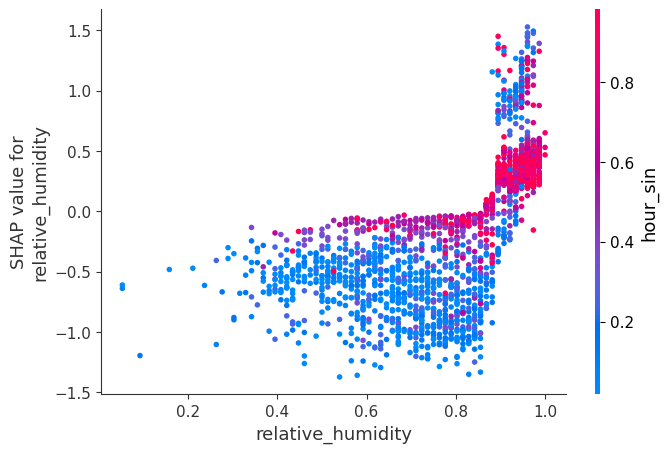

Gerando dependence plot para hour_sin


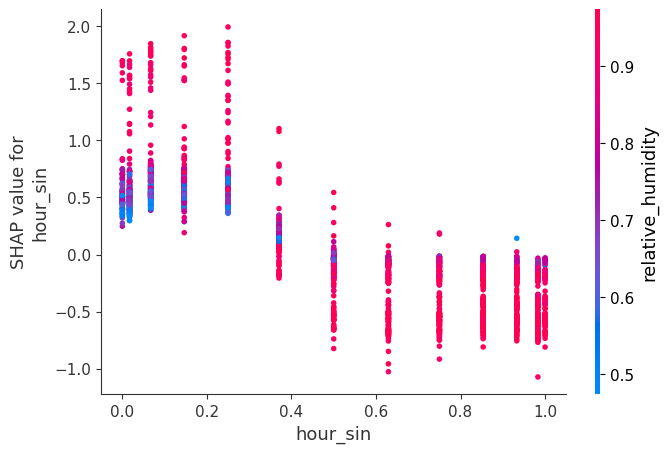

Gerando dependence plot para wind_direction_v


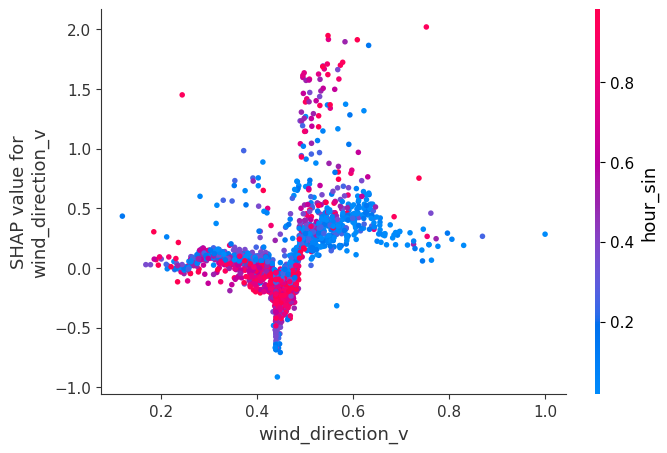

Gerando dependence plot para temperature


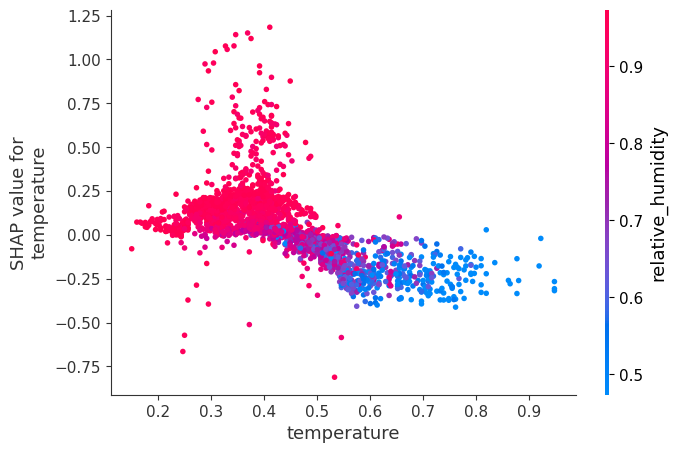

Gerando dependence plot para wind_direction_u


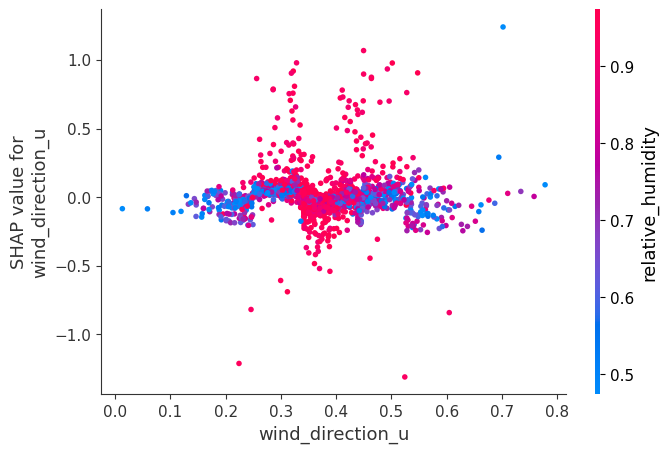

In [63]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Extrai os valores NumPy dos SHAP values
shap_array = shap_vals.values

# Calcula o valor médio absoluto dos SHAP para cada feature
mean_vals = np.abs(shap_array).mean(axis=0)

# Pega os índices das 5 features mais influentes
top_indices = np.argsort(mean_vals)[::-1][:5]
top_features = [X_test.columns[i] for i in top_indices]

# Gera dependence plot para cada uma das 5 features
for feature in top_features:
    print(f"Gerando dependence plot para {feature}")
    shap.dependence_plot(feature, shap_vals.values, X_test)
    plt.show()


###7. Quais features estão mais correlacionadas com outras em termos de contribuição para as predições?

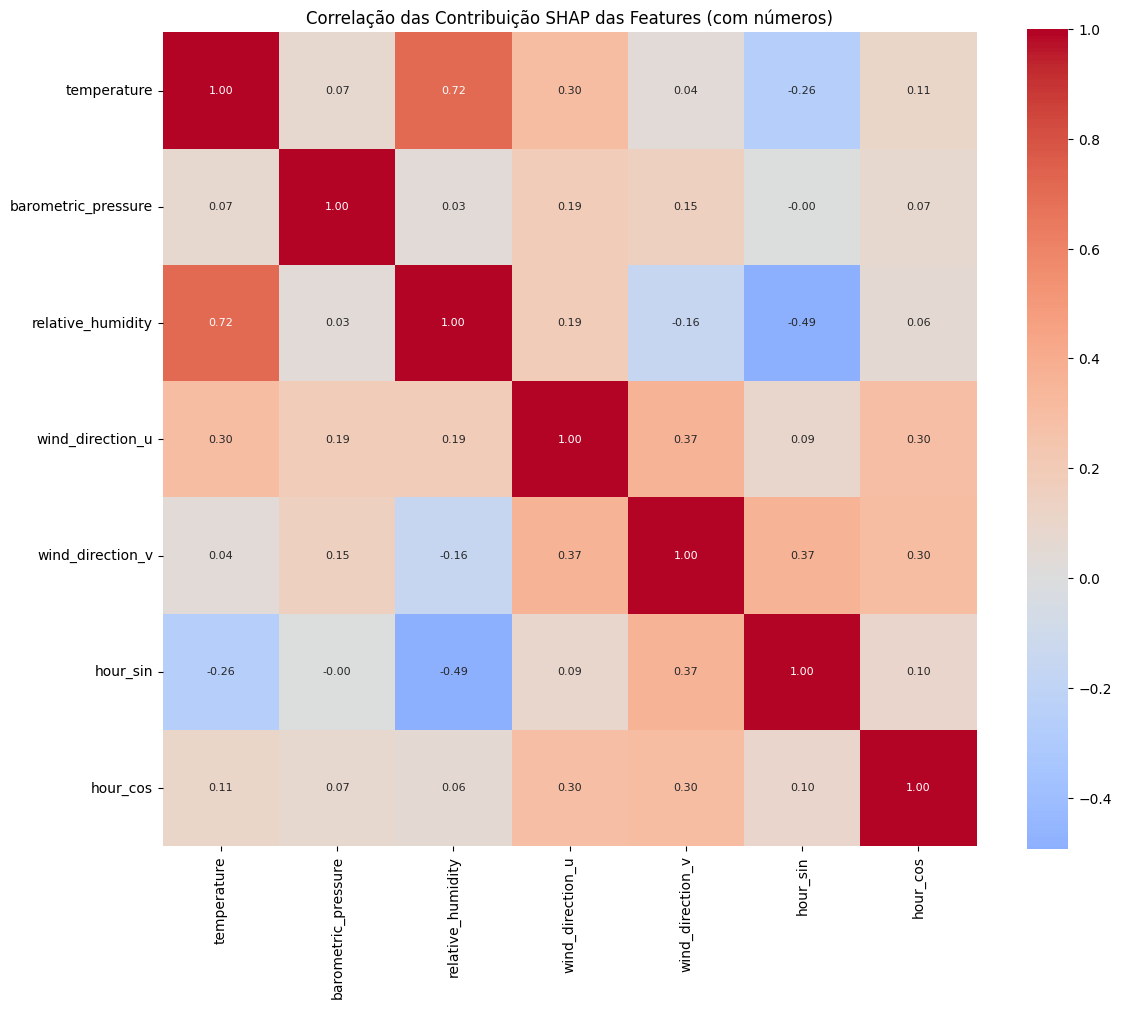

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Transforme SHAP values em DataFrame
shap_df = pd.DataFrame(shap_vals.values, columns=X_test.columns)

# Calcule a correlação
corr_matrix = shap_df.corr()

# Plot do Heatmap das Correlações com os valores anotados
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f",
            annot_kws={"size":8}, square=True)
plt.title("Correlação das Contribuição SHAP das Features (com números)")
plt.tight_layout()
plt.show()


#4) Redução de Dimensionalidade

Considere novamente o problema de classificação ordinal multi-classes apresentado no item 2
deste trabalho. Neste item, você irá realizar um experimento usando o algoritmo PCA. Inicialmente, usando a técnica three-way holdout, escolha o melhor valor para a quantidade de componentes principais, k. Chame o conjunto de dados original de D1, e de D2 o conjunto resultante da aplicação do PCA (com o melhor k) sobre D1. Ajuste dois modelos de classificação multi-classe, um sobre D1, e o outro sobre D2. Em ambos os casos, use o algoritmo GradientBoostingClassifier. Apresente uma análise comparativa entre esse dois modelos

In [116]:
import pickle

f = open("/content/drive/MyDrive/data/A652.pickle", "rb")
X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

y_train_bin = categorize_numeric(y_train)
y_val_bin = categorize_numeric(y_val)
y_test_bin = categorize_numeric(y_test)

{np.int64(0): np.int64(9258), np.int64(1): np.int64(664), np.int64(2): np.int64(88), np.int64(3): np.int64(2)}
{np.int64(0): np.int64(2277), np.int64(1): np.int64(222), np.int64(2): np.int64(6), np.int64(3): np.int64(1)}
{np.int64(0): np.int64(8769), np.int64(1): np.int64(757), np.int64(2): np.int64(50), np.int64(3): np.int64(4), np.int64(4): np.int64(2)}


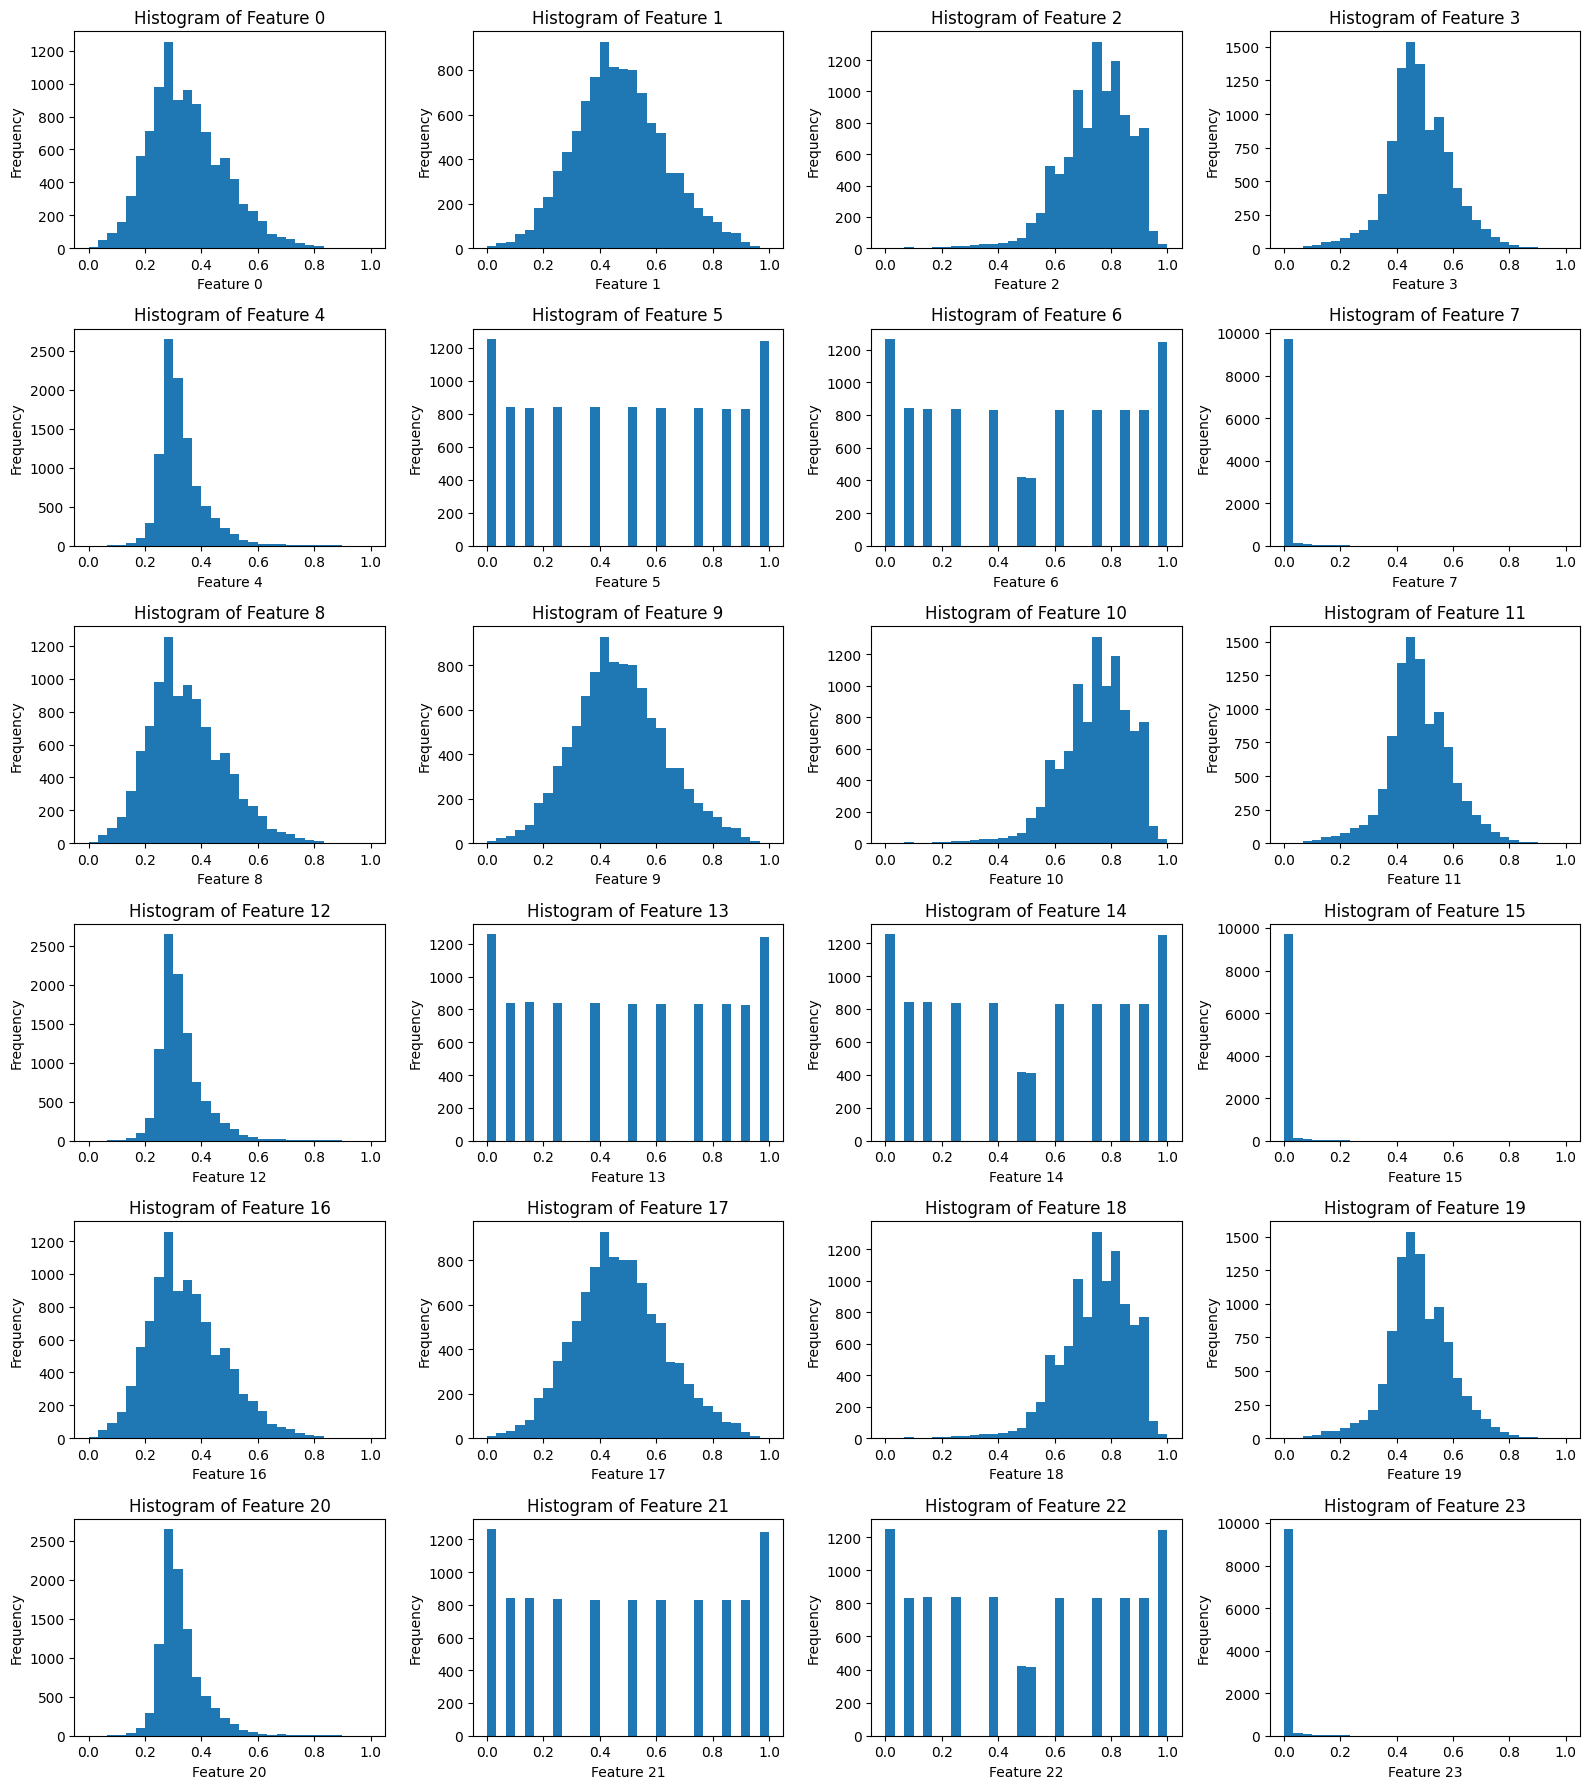

In [117]:
import matplotlib.pyplot as plt
import math

feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
n_features = X_train.shape[1]

cols = 4  # número de colunas na grade
rows = math.ceil(n_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()

for i in range(n_features):
    axes[i].hist(X_train[:, i], bins=30)
    axes[i].set_title(f'Histogram of {feature_names[i]}')
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Escolhendo k baseada na variância acumulada

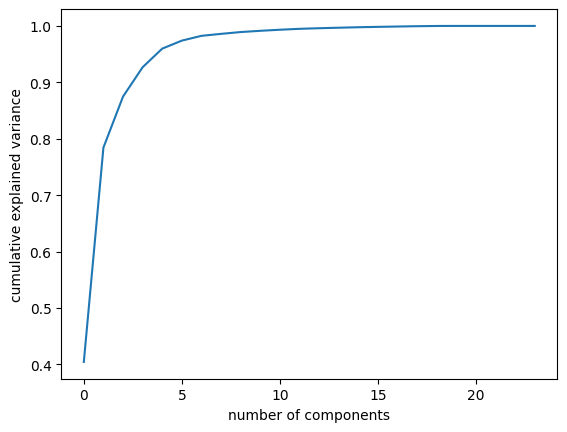

Melhor k explicando 95% da variância: 5


In [118]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)


plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

k_otimo = np.argmax(cumsum >= 0.95) + 1  # comeca em 0
print(f"Melhor k explicando 95% da variância: {k_otimo}")

Parece que com 5 componentes, 95% de variância explicada já seria o suficiente.

In [119]:
def predict_ordinal(X, models=models):
  probs = np.zeros((X.shape[0], len(models)))

  for k, model in enumerate(models):
    if model is not None:
      probs[:, k] = model.predict_proba(X)[:, 1]  # prob de y > k
    else:
      probs[:, k] = 0 # nao tem

  # a classe predita é a quantidade com prob > 0.5
  preds = (probs > 0.5).sum(axis=1)
  return preds

### Aplicando o PCA com o k escolhido

In [120]:
# treinando o pca com k componentes no D1
pca = PCA(n_components=k_otimo).fit(X_train)

# aplicando o mesmo pca em treino validacao e teste
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

X_train_pca.shape, X_val_pca.shape, X_test_pca.shape

((10012, 5), (2506, 5), (9582, 5))

### Treinando os modelos

In [121]:
models_pca = fit_ordinal(GradientBoostingClassifier, X_train_pca, y_train_bin)
models = fit_ordinal(GradientBoostingClassifier, X_train, y_train_bin)

In [122]:
y_pred_pca = predict_ordinal(X_test_pca, models_pca)
y_pred = predict_ordinal(X_test, models)

In [123]:
from sklearn.metrics import accuracy_score, mean_absolute_error

print("=== Modelo Original ===")
print("Accuracy:", accuracy_score(y_test_bin, y_pred))
print("MAE:", mean_absolute_error(y_test_bin, y_pred))

print("\n=== Modelo com PCA ===")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_pca))
print("MAE:", mean_absolute_error(y_test_bin, y_pred_pca))

=== Modelo Original ===
Accuracy: 0.9071175120016698
MAE: 0.1358797745773325

=== Modelo com PCA ===
Accuracy: 0.9128574410352744
MAE: 0.10300563556668754


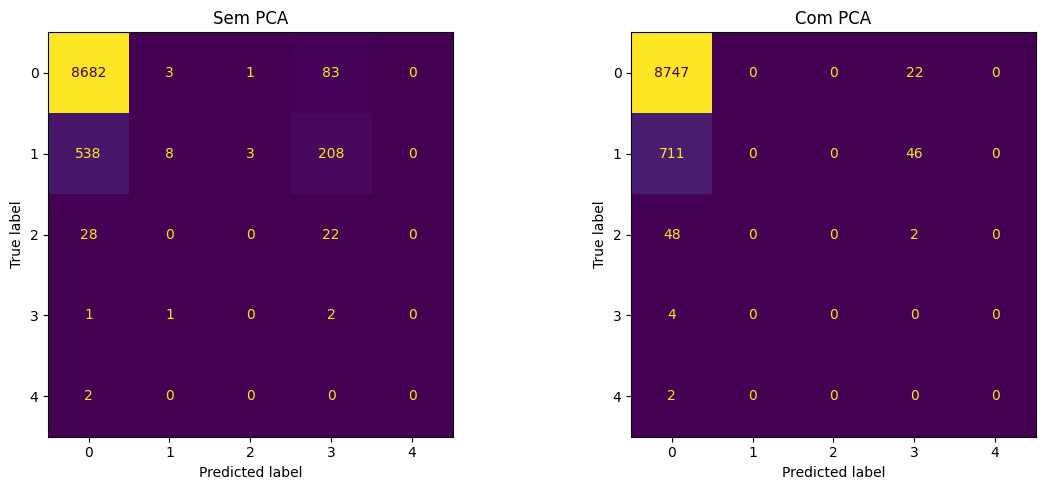

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

cm1 = confusion_matrix(y_test_bin, y_pred)
cm2 = confusion_matrix(y_test_bin, y_pred_pca)

ConfusionMatrixDisplay(cm1).plot(ax=axs[0], colorbar=False)
axs[0].set_title("Sem PCA")

ConfusionMatrixDisplay(cm2).plot(ax=axs[1], colorbar=False)
axs[1].set_title("Com PCA")

plt.tight_layout()
plt.show()

In [125]:
from sklearn.metrics import classification_report

print("Classificador Comum:\n")
print(classification_report(y_test_bin, y_pred, target_names=labels, zero_division=0))
print("Classificador + PCA:\n")
print(classification_report(y_test_bin, y_pred_pca, target_names=labels, zero_division=0))

Classificador Comum:

              precision    recall  f1-score   support

        NONE       0.94      0.99      0.96      8769
        WEAK       0.67      0.01      0.02       757
    MODERATE       0.00      0.00      0.00        50
      STRONG       0.01      0.50      0.01         4
     EXTREME       0.00      0.00      0.00         2

    accuracy                           0.91      9582
   macro avg       0.32      0.30      0.20      9582
weighted avg       0.91      0.91      0.88      9582

Classificador + PCA:

              precision    recall  f1-score   support

        NONE       0.92      1.00      0.96      8769
        WEAK       0.00      0.00      0.00       757
    MODERATE       0.00      0.00      0.00        50
      STRONG       0.00      0.00      0.00         4
     EXTREME       0.00      0.00      0.00         2

    accuracy                           0.91      9582
   macro avg       0.18      0.20      0.19      9582
weighted avg       0.84      0.91

#5) Predição Conforme

Considere novamente o conjunto de dados O conjunto de dados diamonds. Neste item, você deve usar a técnica de predição conforme (conformal prediction) para produzir intervalos de predição para os exemplos que separar para seu conjunto de testes. Apresente uma análise para os exemplos do conjunto de testes que apresentarem o maior e o menor intervalos.

In [127]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = diamonds_processed
df.info()

X = df.drop(columns=["log_price"])
log_y = df["log_price"] # lembrar de transformar dps

X_train, X_temp, y_train, y_temp = train_test_split(X, log_y, test_size=0.4)
X_calib, X_test, y_calib, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

X_train.shape, X_calib.shape, X_test.shape, y_train.shape, y_calib.shape, y_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   log_carat        53940 non-null  float64
 1   log_price        53940 non-null  float64
 2   log_volume       53940 non-null  float64
 3   is_heavy         53940 non-null  int64  
 4   color_encoded    53940 non-null  int64  
 5   clarity_encoded  53940 non-null  int64  
 6   cut_encoded      53940 non-null  int64  
 7   table            53940 non-null  float64
 8   depth            53940 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.7 MB


((32364, 8), (10788, 8), (10788, 8), (32364,), (10788,), (10788,))

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [130]:
import numpy as np

# 1. Previsões no conjunto de calibração
y_calib_pred = model.predict(X_calib)

# 2. Erros absolutos
residuals = np.abs(y_calib - y_calib_pred)

# 3. Escolha um nível de confiança (ex: 90%)
alpha = 0.1
quantile = np.quantile(residuals, 1 - alpha)

# 4. Previsões no conjunto de teste
y_test_pred = model.predict(X_test)

# 5. Intervalos de predição
lower_bounds = y_test_pred - quantile
upper_bounds = y_test_pred + quantile

# 6. Destransformar Log
lower_bounds = np.expm1(lower_bounds)
upper_bounds = np.expm1(upper_bounds)
y_pred = np.expm1(y_test_pred)
y_true = np.expm1(y_test)

price_intervals = pd.DataFrame({"y_true": y_true,"y_pred": y_pred,"lower_price": lower_bounds,"upper_price": upper_bounds})

In [94]:
price_intervals["interval_width"] = price_intervals["upper_price"] - price_intervals["lower_price"]

# Maior intervalo
max_interval = price_intervals.loc[price_intervals["interval_width"].idxmax()]

# Menor intervalo
min_interval = price_intervals.loc[price_intervals["interval_width"].idxmin()]


In [95]:
print(max_interval)

y_true            17051.000000
y_pred            17900.236262
lower_price       14988.260573
upper_price       21377.923808
interval_width     6389.663235
Name: 26972, dtype: float64


Exemplo o qual o modelo está menos confiante na previsão, refletido por um erro absoluto maior. Isso pode indicar:

- Uma combinação de características (em X_test) rara ou pouco representada nos dados de calibração.

- Um valor predito de y_pred que estava muito distante da média dos dados.

- Um possível outlier ou observação com alta variabilidade.

**Interpretação:**

Isso pode ser especialmente notável quando o valor de carat, volume ou outros preditores estiver em uma faixa incomum.

In [110]:
x_max = X_test.loc[26972]
x_max

,26972
log_carat,1.128171
log_volume,5.835736
is_heavy,1.000000
color_encoded,4.000000
clarity_encoded,4.000000
cut_encoded,4.000000
table,57.000000
depth,61.800000


In [96]:
print(min_interval)

y_true            449.000000
y_pred            329.587171
lower_price       275.810896
upper_price       393.810606
interval_width    117.999710
Name: 30947, dtype: float64


Esse exemplo representa uma alta confiança na predição. Provavelmente:

- A observação possui características bem representadas.

- O modelo aprendeu bem a relação entre X e y nessa região do espaço de entrada.

**Interpretação:**

Esse exemplo mostra um caso "típico" para o modelo, em que ele é muito preciso. O intervalo estreito significa que a incerteza do modelo é baixa nesse ponto.

In [109]:
x_min = X_test.loc[30947]
x_min

,30947
log_carat,0.207014
log_volume,3.624442
is_heavy,0.000000
color_encoded,7.000000
clarity_encoded,2.000000
cut_encoded,3.000000
table,57.000000
depth,63.500000


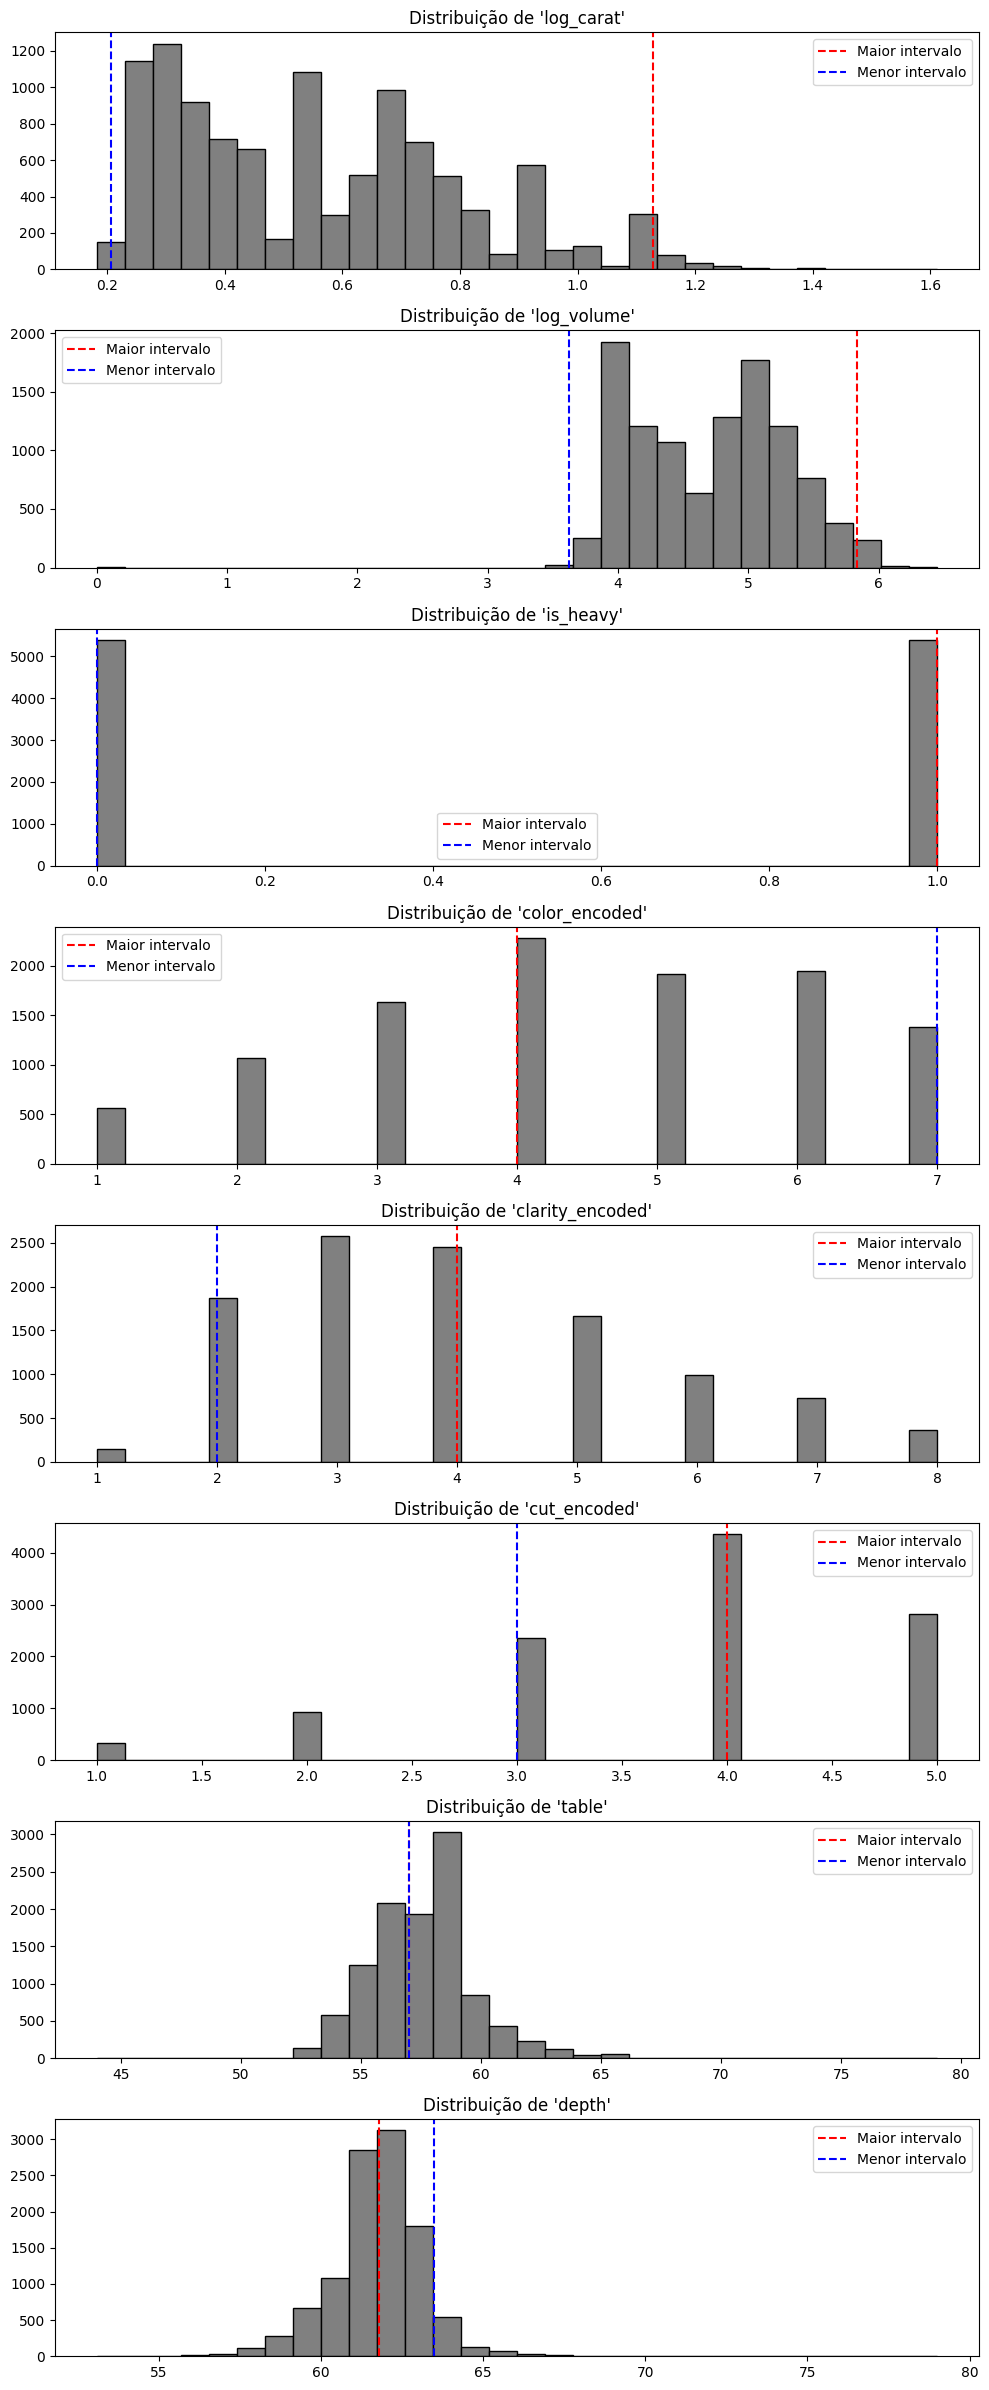

In [113]:
import matplotlib.pyplot as plt

# Plotar histogramas
fig, axs = plt.subplots(nrows=len(X_test.columns), figsize=(10, 3 * len(X_test.columns)))

for i, col in enumerate(X_test.columns):
    axs[i].hist(X_test[col], bins=30, color="grey", edgecolor='black')

    # Linha vermelha: maior intervalo
    axs[i].axvline(x=x_max[col], color='red', linestyle='--', label='Maior intervalo')

    # Linha azul: menor intervalo
    axs[i].axvline(x=x_min[col], color='blue', linestyle='--', label='Menor intervalo')

    axs[i].set_title(f"Distribuição de '{col}'")
    axs[i].legend()

plt.tight_layout()
plt.show()